In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [5]:
from statsmodels.tsa.arima_model import ARIMA

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
path = "C:/Users/Ansari Aaquib/Downloads/drive-download-20210519T143124Z-001/Python/Time Series/mrf/mrf.csv"

In [10]:
stock = pd.read_csv(path)

In [11]:
stock.head(10)

,Month,Open Price,High Price,Low Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,Jan-06,2780.0,2895.5,2670.00,2811.60,39623,3358,109309329,27061,68.30,225.50,31.60
1,Feb-06,2820.0,3399.0,2800.00,3056.45,77350,8001,242294622,42901,55.46,599.00,236.45
2,Mar-06,3075.0,3287.5,3040.00,3103.20,55500,4988,176800378,39229,70.68,247.50,28.20
3,Apr-06,3160.0,4051.0,3131.00,3456.15,131712,12834,496800616,59934,45.50,920.00,296.15
4,May-06,3550.0,3650.0,2747.00,2789.80,29158,4432,96482558,18375,63.02,903.00,-760.20
5,Jun-06,2860.0,2860.0,2025.20,2395.85,19944,3030,48817959,12863,64.50,834.80,-464.15
6,Jul-06,2439.0,2970.0,2400.00,2942.40,38013,2806,97822495,27924,73.46,570.00,503.40
7,Aug-06,2940.0,3835.0,2884.05,3708.30,83527,9440,288265551,44988,53.86,950.95,768.30
8,Sep-06,3667.0,4044.0,3667.00,3836.75,50404,5396,193931445,32615,64.71,377.00,169.75
9,Oct-06,3885.0,4770.0,3845.00,4185.50,107956,13788,477329035,45239,41.91,925.00,300.50


In [12]:
mystock = stock[['Close Price']]

In [13]:
print(mystock)

     Close Price
0        2811.60
1        3056.45
2        3103.20
3        3456.15
4        2789.80
..           ...
120     35607.10
121     32429.35
122     38368.50
123     33791.60
124     33759.60

[125 rows x 1 columns]


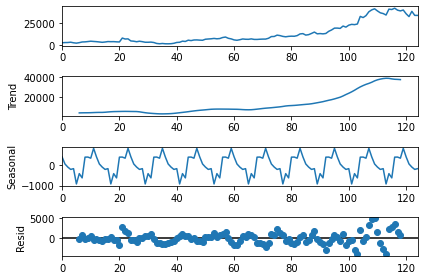

In [15]:
seasonal_decompose(mystock,period=12).plot();

In [17]:
adfuller(mystock)

(-0.013389193385995424,
 0.9574107029213336,
 0,
 124,
 {'1%': -3.484219653271961,
  '5%': -2.885145235641637,
  '10%': -2.579359138917794},
 1978.6902898317956)

In [18]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)
        
    return(msg)

checkStationarity(mystock)



'pvalue=0.9574107029213336. Data is not Stationary. Make the data stationary before model building'

Text(0.5, 1.0, 'Stock Close Prices')

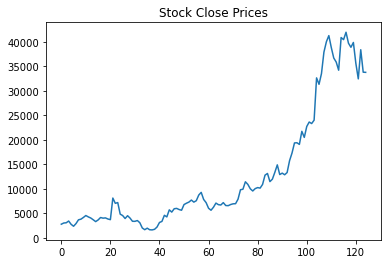

In [19]:
plt.plot(mystock)
plt.title('Stock Close Prices')


In [20]:
mystock.shift()

,Close Price
0,NaN
1,2811.60
2,3056.45
3,3103.20
4,3456.15
...,...
120,39847.60
121,35607.10
122,32429.35
123,38368.50


In [21]:
mystock

,Close Price
0,2811.60
1,3056.45
2,3103.20
3,3456.15
4,2789.80
...,...
120,35607.10
121,32429.35
122,38368.50
123,33791.60


In [23]:
diff_mystock = mystock - mystock.shift()
print(diff_mystock)


     Close Price
0            NaN
1         244.85
2          46.75
3         352.95
4        -666.35
..           ...
120     -4240.50
121     -3177.75
122      5939.15
123     -4576.90
124       -32.00

[125 rows x 1 columns]


In [24]:
print('Before removing Nulls,total records = ', len(diff_mystock))

Before removing Nulls,total records =  125


In [25]:
diff_mystock.isnull().sum()

Close Price    1
dtype: int64

In [26]:
diff_mystock.dropna(inplace=True)

In [27]:
diff_mystock.isnull().sum()

Close Price    0
dtype: int64

In [21]:
print('After removing Nulls,total records = ', len(diff_mystock))

After removing Nulls,total records =  124


In [28]:
print(diff_mystock)

     Close Price
1         244.85
2          46.75
3         352.95
4        -666.35
5        -393.95
..           ...
120     -4240.50
121     -3177.75
122      5939.15
123     -4576.90
124       -32.00

[124 rows x 1 columns]


In [29]:
checkStationarity(diff_mystock)

'pvalue=5.060193512253538e-23. Data is Stationary. Proceed to model building'

Text(0.5, 1.0, 'Differenced Close Price Data')

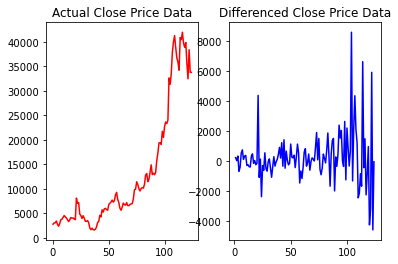

In [30]:
plt.subplot(121)
plt.plot(mystock,color='red')
plt.title('Actual Close Price Data')

plt.subplot(122)
plt.plot(diff_mystock,color='blue')
plt.title('Differenced Close Price Data')

In [25]:
lags=20

In [28]:
lag_acf = acf(diff_mystock, nlags=lags)
lag_pacf = pacf(diff_mystock, nlags=lags, method='ols')

Text(0.5, 1.0, 'Auto Correlation [ACF]')

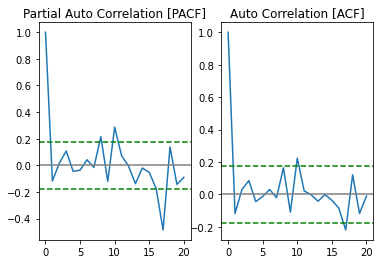

In [29]:
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='-',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='green')
plt.title('Partial Auto Correlation [PACF]')

plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='-',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='green')
plt.title('Auto Correlation [ACF]')


In [30]:
p=5; q=1; d=0

In [32]:
ml = ARIMA(diff_mystock, order = (p,d,q)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

In [33]:
print(ml.summary())

                              ARMA Model Results                              
Dep. Variable:            Close Price   No. Observations:                  124
Model:                     ARMA(5, 1)   Log Likelihood               -1092.570
Method:                       css-mle   S.D. of innovations           1618.666
Date:                Tue, 06 Jul 2021   AIC                           2201.141
Time:                        19:53:29   BIC                           2223.703
Sample:                             0   HQIC                          2210.306
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               251.7505    138.039      1.824      0.068     -18.801     522.302
ar.L1.Close Price    -0.9930      0.103     -9.685      0.000      -1.194      -0.792
ar.L2.Close Price    -0.

Text(0.5, 1.0, 'Model Residuals Distribution')

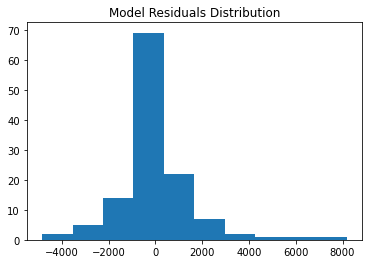

In [34]:
plt.hist(ml.resid)
plt.title('Model Residuals Distribution')

In [35]:
import statsmodels.api as sm

In [36]:
pvalue = sm.stats.acorr_ljungbox(ml.resid,lags=[1])[1]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [37]:
if pvalue < 0.05:
    print('Reject H0: Bad model')
else:
    print('FTR H0: Good model')

FTR H0: Good model


In [39]:
print('AIC={}\nBIC={}'.format(ml.aic,ml.bic))

AIC=2201.1406095046773
BIC=2223.7028620295177


In [40]:
pred = ml.forecast(steps=11)

In [41]:
print(pred)

(array([ 922.1987849 , -263.54980074, -292.82846559, 1519.59302165,
       -961.70373162, 1186.63227967, -394.12031377,  809.86302219,
       -364.68134302,  947.1093787 , -478.3309489 ]), array([1618.6661815 , 1623.50880391, 1623.53033608, 1635.83177262,
       1641.31785051, 1644.054477  , 1650.43681813, 1656.77691906,
       1659.17813219, 1659.86707854, 1660.41568228]), array([[-2250.32863384,  4094.72620363],
       [-3445.568585  ,  2918.46898351],
       [-3474.88945212,  2889.23252094],
       [-1686.57833744,  4725.76438075],
       [-4178.6276058 ,  2255.22014257],
       [-2035.65528387,  4408.91984321],
       [-3628.91703606,  2840.67640853],
       [-2437.36006958,  4057.08611396],
       [-3616.61072605,  2887.24804002],
       [-2306.17031436,  4200.38907175],
       [-3732.68588554,  2776.02398774]]))


In [43]:
f = pred[0]
print(f)
len(f)

[ 922.1987849  -263.54980074 -292.82846559 1519.59302165 -961.70373162
 1186.63227967 -394.12031377  809.86302219 -364.68134302  947.1093787
 -478.3309489 ]


11

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# ADF (augmented dickey fuller test)
from statsmodels.tsa.stattools import adfuller,acf,pacf

# ARIMA
from statsmodels.tsa.arima_model import ARIMA

# to extract the different TS components
from statsmodels.tsa.seasonal import seasonal_decompose


In [5]:
path = "C:/Users/Ansari Aaquib/Downloads/drive-download-20210519T143124Z-001/mrf/mrf.csv"

In [6]:
stock = pd.read_csv(path)

    Month  Open Price  High Price  Low Price  Close Price  No.of Shares  \
0  Jan-06      2780.0      2895.5    2670.00      2811.60         39623   
1  Feb-06      2820.0      3399.0    2800.00      3056.45         77350   
2  Mar-06      3075.0      3287.5    3040.00      3103.20         55500   
3  Apr-06      3160.0      4051.0    3131.00      3456.15        131712   
4  May-06      3550.0      3650.0    2747.00      2789.80         29158   
5  Jun-06      2860.0      2860.0    2025.20      2395.85         19944   
6  Jul-06      2439.0      2970.0    2400.00      2942.40         38013   
7  Aug-06      2940.0      3835.0    2884.05      3708.30         83527   
8  Sep-06      3667.0      4044.0    3667.00      3836.75         50404   
9  Oct-06      3885.0      4770.0    3845.00      4185.50        107956   

   No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0           3358             109309329                 27061   
1           8001             242294622        

(-0.013389193385995424,
 0.9574107029213336,
 0,
 124,
 {'1%': -3.484219653271961,
  '5%': -2.885145235641637,
  '10%': -2.579359138917794},
 1978.6902898317956)

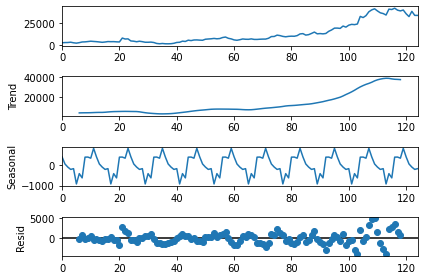

In [7]:
print(stock.head(10))

stock.columns

# take the feature to do forecast
mystock = stock[['Close Price']]
print(mystock)

# extract the components of a time series data (SCSI components)
seasonal_decompose(mystock, period=12).plot();

adfuller(mystock)


In [8]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)
        
    return(msg)

# function call
checkStationarity(mystock)

'pvalue=0.9574107029213336. Data is not Stationary. Make the data stationary before model building'

Text(0.5, 1.0, 'Stock Close Prices')

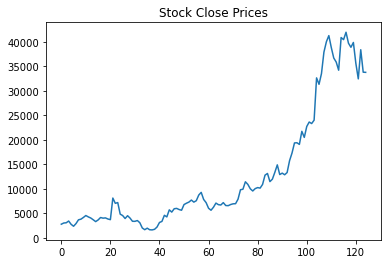

In [9]:
plt.plot(mystock)
plt.title('Stock Close Prices')


In [10]:
diff_mystock = mystock - mystock.shift()
print(diff_mystock)

     Close Price
0            NaN
1         244.85
2          46.75
3         352.95
4        -666.35
..           ...
120     -4240.50
121     -3177.75
122      5939.15
123     -4576.90
124       -32.00

[125 rows x 1 columns]


In [11]:
print('Before removing Nulls,total records = ', len(diff_mystock))
diff_mystock.dropna(inplace = True)
print('After removing Nulls, total records = ', len(diff_mystock))
print(diff_mystock)

Before removing Nulls,total records =  125
After removing Nulls, total records =  124
     Close Price
1         244.85
2          46.75
3         352.95
4        -666.35
5        -393.95
..           ...
120     -4240.50
121     -3177.75
122      5939.15
123     -4576.90
124       -32.00

[124 rows x 1 columns]


In [12]:
checkStationarity(diff_mystock)

'pvalue=5.060193512253538e-23. Data is Stationary. Proceed to model building'

Text(0.5, 1.0, 'Differenced Close Price Data')

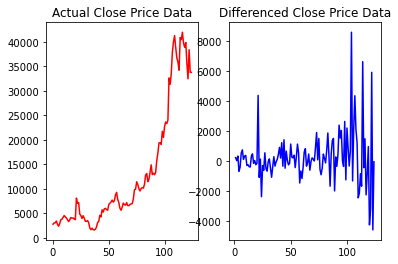

In [13]:
plt.subplot(121)
plt.plot(mystock,color='red')
plt.title('Actual Close Price Data')

plt.subplot(122)
plt.plot(diff_mystock,color='blue')
plt.title('Differenced Close Price Data')



In [14]:
lags=20
lag_acf = acf(diff_mystock, nlags=lags)
lag_pacf = pacf(diff_mystock, nlags=lags, method='ols')


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Auto Correlation [ACF]')

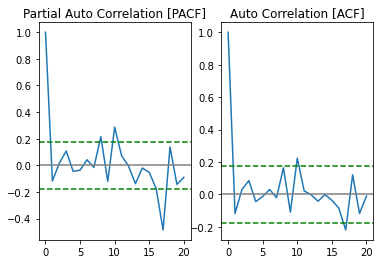

In [15]:
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='-',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='green')
plt.title('Partial Auto Correlation [PACF]')

# plot the ACF
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='-',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='green')
plt.title('Auto Correlation [ACF]')


In [16]:
p=5; q=1; d=0

# build the ARIMA model
m1 = ARIMA(diff_mystock, order=(p,d,q)).fit()
print(m1.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

                              ARMA Model Results                              
Dep. Variable:            Close Price   No. Observations:                  124
Model:                     ARMA(5, 1)   Log Likelihood               -1092.570
Method:                       css-mle   S.D. of innovations           1618.666
Date:                Wed, 07 Jul 2021   AIC                           2201.141
Time:                        14:22:43   BIC                           2223.703
Sample:                             0   HQIC                          2210.306
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               251.7505    138.039      1.824      0.068     -18.801     522.302
ar.L1.Close Price    -0.9930      0.103     -9.685      0.000      -1.194      -0.792
ar.L2.Close Price    -0.

In [17]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(m1.resid, lags=[1])[1]

if pvalue < 0.05:
    print('Reject H0: Bad model')
else:
    print('FTR H0: Good model')

FTR H0: Good model


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [18]:
preds = m1.forecast(steps=11)
print(preds)

# forecasts for the 11 months
f = preds[0]
print(f)
len(f)

(array([ 922.1987849 , -263.54980074, -292.82846559, 1519.59302165,
       -961.70373162, 1186.63227967, -394.12031377,  809.86302219,
       -364.68134302,  947.1093787 , -478.3309489 ]), array([1618.6661815 , 1623.50880391, 1623.53033608, 1635.83177262,
       1641.31785051, 1644.054477  , 1650.43681813, 1656.77691906,
       1659.17813219, 1659.86707854, 1660.41568228]), array([[-2250.32863384,  4094.72620363],
       [-3445.568585  ,  2918.46898351],
       [-3474.88945212,  2889.23252094],
       [-1686.57833744,  4725.76438075],
       [-4178.6276058 ,  2255.22014257],
       [-2035.65528387,  4408.91984321],
       [-3628.91703606,  2840.67640853],
       [-2437.36006958,  4057.08611396],
       [-3616.61072605,  2887.24804002],
       [-2306.17031436,  4200.38907175],
       [-3732.68588554,  2776.02398774]]))
[ 922.1987849  -263.54980074 -292.82846559 1519.59302165 -961.70373162
 1186.63227967 -394.12031377  809.86302219 -364.68134302  947.1093787
 -478.3309489 ]


11

In [19]:
print(mystock.tail())
print(diff_mystock.tail())

     Close Price
120     35607.10
121     32429.35
122     38368.50
123     33791.60
124     33759.60
     Close Price
120     -4240.50
121     -3177.75
122      5939.15
123     -4576.90
124       -32.00


In [20]:
df=pd.DataFrame({'first':mystock.iloc[123]['Close Price'],
                'second':mystock.iloc[124]['Close Price'],
                'diff':diff_mystock.iloc[123]})


In [21]:
df

,first,second,diff
Close Price,33791.6,33759.6,-32.0


In [23]:
for i in range(len(f)):
    fv = df['second'][i]
    diff = f[i]
    sv = fv + diff
    
    df=df.append({'first':fv,'second':sv,'diff':diff},ignore_index=True)


In [24]:
df

,first,second,diff
0,33791.600000,33759.600000,-32.000000
1,33759.600000,34681.798785,922.198785
2,34681.798785,34418.248984,-263.549801
3,34418.248984,34125.420519,-292.828466
4,34125.420519,35645.013540,1519.593022
5,35645.013540,34683.309809,-961.703732
6,34683.309809,35869.942088,1186.632280
7,35869.942088,35475.821775,-394.120314
8,35475.821775,36285.684797,809.863022
9,36285.684797,35921.003454,-364.681343


In [25]:
lags = 30

In [26]:
ma = mystock.rolling(window=lags).mean()

In [27]:
ma

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
120,29748.430000
121,30399.780000
122,31233.880000
123,31834.833333


Text(0.5, 1.0, 'Actual Data')

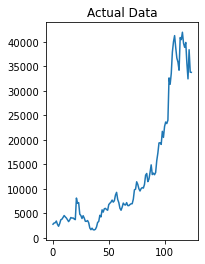

In [28]:
plt.subplot(121)
plt.plot(mystock)
plt.title('Actual Data')


Text(0.5, 1.0, 'Moving Average')

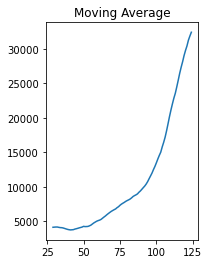

In [29]:
plt.subplot(122)
plt.plot(ma)
plt.title('Moving Average')


In [30]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [31]:
m1 = SimpleExpSmoothing(mystock).fit(smoothing_level=0.2,optimized=False)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [32]:
f1 = m1.fittedvalues

In [34]:
pd.DataFrame({'actual':mystock['Close Price'],'forecast':f1})

,actual,forecast
0,2811.60,2811.600000
1,3056.45,2811.600000
2,3103.20,2860.570000
3,3456.15,2909.096000
4,2789.80,3018.506800
...,...,...
120,35607.10,38688.281887
121,32429.35,38072.045510
122,38368.50,36943.506408
123,33791.60,37228.505126


In [35]:
m2 = SimpleExpSmoothing(mystock).fit(smoothing_level=0.8,optimized=False)
f2 = m2.fittedvalues

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [36]:
pd.DataFrame({'Actual':mystock['Close Price'], 'Forecast':f2})

,Actual,Forecast
0,2811.60,2811.600000
1,3056.45,2811.600000
2,3103.20,3007.480000
3,3456.15,3084.056000
4,2789.80,3381.731200
...,...,...
120,35607.10,39698.946318
121,32429.35,36425.469264
122,38368.50,33228.573853
123,33791.60,37340.514771


In [38]:
m3 = ExponentialSmoothing(mystock,trend='additive').fit(smoothing_level=0.2,smoothing_slope=0.5)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-38-f60c97538327>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  m3 = ExponentialSmoothing(mystock,trend='additive').fit(smoothing_level=0.2,smoothing_slope=0.5)


In [39]:
f3 = m3.fittedvalues

Text(0.5, 1.0, 'Double Exponent Smoothing')

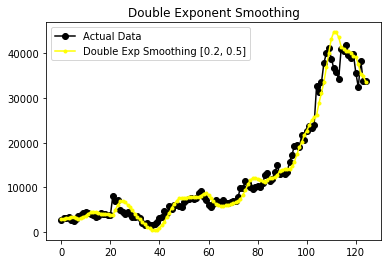

In [43]:
plt.plot(mystock,marker='o',color='black',label='Actual Data')
plt.plot(f3,marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

In [46]:
m3.forecast(10)

125    32599.045768
126    31524.998591
127    30450.951414
128    29376.904237
129    28302.857060
130    27228.809883
131    26154.762706
132    25080.715530
133    24006.668353
134    22932.621176
dtype: float64

In [47]:
hm1 = Holt(mystock,exponential=False).fit()

# assumption: model is not linear
hm2 = Holt(mystock,exponential=True).fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Double Exponent Smoothing - Holts library')

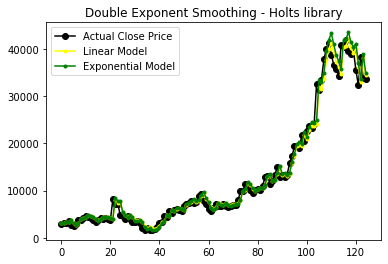

In [48]:
plt.plot(mystock,marker='o',color='black',label='Actual Close Price')
plt.plot(hm1.fittedvalues,marker='.',color='yellow',label='Linear Model')
plt.plot(hm2.fittedvalues,marker='.',color='green',label='Exponential Model')
plt.legend()
plt.title('Double Exponent Smoothing - Holts library')
######## 

In [53]:
path = "C:/Users/Ansari Aaquib/Downloads/drive-download-20210519T143124Z-001/elecprod/elecprod.csv"
data=pd.read_csv(path,index_col='DATE',parse_dates=True)
data.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


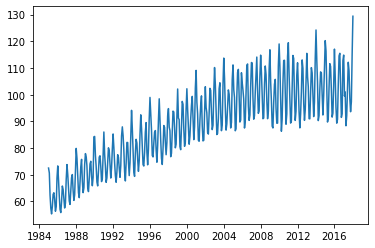

In [54]:
plt.plot(data)

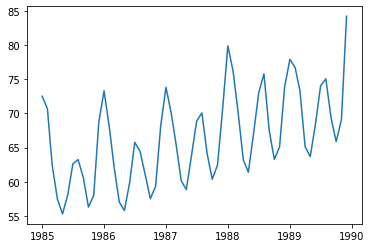

In [55]:
plt.plot(data[0:60])

In [56]:
data.Value

DATE
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048
Name: Value, Length: 397, dtype: float64

In [57]:
m5 = ExponentialSmoothing(data.Value,trend='add',seasonal='add',seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Text(0.5, 1.0, 'Triple Exp Smoothing')

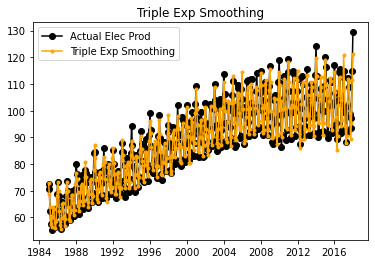

In [58]:
plt.plot(data.Value,marker='o',color='black',label='Actual Elec Prod')
plt.plot(m5.fittedvalues,marker='.',color='orange',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exp Smoothing')

In [59]:
ma.head(30)

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN
